<a href="https://www.kaggle.com/code/lumusa/trabajo-fsi-final?scriptVersionId=227801571" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import tensorflow
tensorflow.test.gpu_device_name()

'/device:GPU:0'

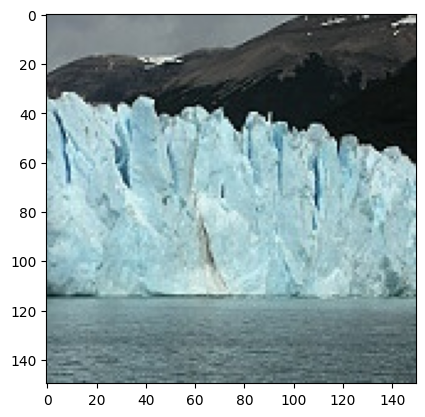

In [2]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/kaggle/input/intel-image-classification/seg_test/seg_test/glacier/20059.jpg', 'r')

imshow(np.asarray(pil_im))

In [3]:
train_data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
validation_data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_data_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

image_size  = (150, 150)
batch_size = 32

In [4]:
import tensorflow
train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=1337,
    label_mode='categorical',

)

validation_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    label_mode='categorical'
)

test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
train_ds = train_ds.prefetch(buffer_size=batch_size)
validation_ds = validation_ds.prefetch(buffer_size=batch_size)
test_ds = test_ds.prefetch(buffer_size=batch_size)



Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.


In [5]:
from tensorflow.keras import backend as K
from time import time

train_data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
validation_data_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_data_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

image_size  = (150, 150)
batch_size = 32

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, Input                  

# MODEL --------------------------------------------------

model = Sequential([
    Input(shape=(150, 150, 3)),
    Rescaling(1./255),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')
])


model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,462,534 (28.47 MB)

 Trainable params: 7,462,534 (28.47 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=tensorflow.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

epochs = 100

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(
          train_ds,
          epochs=epochs,
          validation_data = validation_ds,
          callbacks = [es]
)

Epoch 1/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 55s 121ms/step - accuracy: 0.4365 - loss: 1.3757 - val_accuracy: 0.6326 - val_loss: 0.9157
Epoch 2/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.6596 - loss: 0.8997 - val_accuracy: 0.7423 - val_loss: 0.7160
Epoch 3/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 75ms/step - accuracy: 0.7211 - loss: 0.7536 - val_accuracy: 0.7591 - val_loss: 0.6591
Epoch 4/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.7725 - loss: 0.6397 - val_accuracy: 0.7776 - val_loss: 0.6040
Epoch 5/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 77ms/step - accuracy: 0.8042 - loss: 0.5637 - val_accuracy: 0.7908 - val_loss: 0.5912
Epoch 6/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.8129 - loss: 0.5264 - val_accuracy: 0.8261 - val_loss: 0.4897
Epoch 7/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.8397 - loss: 0.4622 - val_accuracy: 0.8418 - val_loss: 0.4643
Epoch 8/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.8439 - loss: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━

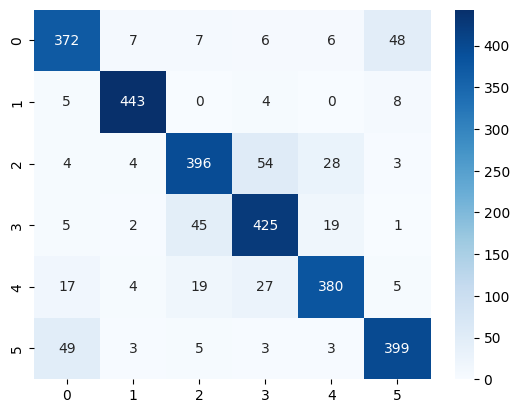

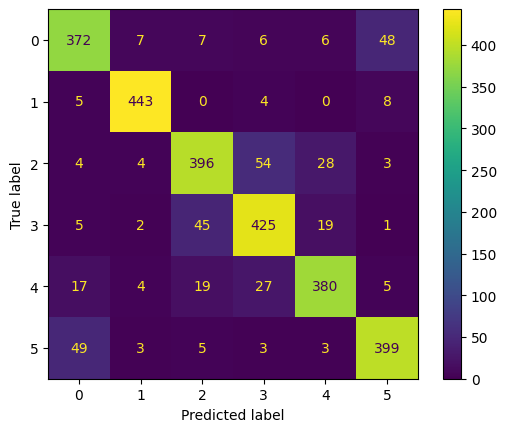

In [9]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in validation_ds], axis=1)

labels = np.argmax(results[0], axis=1)
predictions = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()

print(classification_report(labels, predictions, digits = 4))


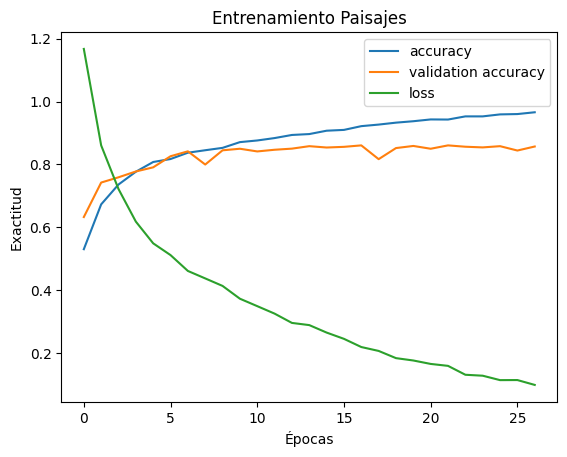

In [10]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='loss')

plt.title('Entrenamiento Paisajes')

plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend(loc="upper right")

plt.show()

(150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
El vector de salida obtenido:  [[1.7948700e-05 6.5742592e-05 1.0735823e-02 4.6537216e-03 9.8372030e-01
  8.0650783e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
La etiqueta de salida predicha es  mar


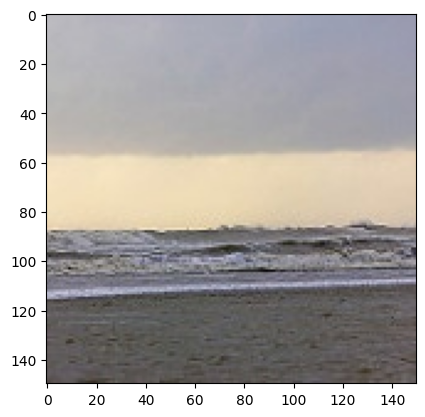

In [11]:
# PRODUCTION ----------------------------------------------

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import tensorflow.keras

# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

etiquetas=["edificios", "bosque", "glaciar", "montaña", "mar", "calle"]
%matplotlib inline

pil_im = Image.open('/kaggle/input/intel-image-classification/seg_test/seg_test/sea/20106.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3

im = im.reshape(1,150,150,3)


print('El vector de salida obtenido: ', model.predict(im))
print('La etiqueta de salida predicha es ', etiquetas[np.argmax(model.predict(im))])

In [12]:
# PRODUCTION ----------------------------------------------


# SAVING --------------------------------------------------
#model.save_model("mimodelo.h5")


# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

etiquetas=["edifcios", "bosque", "glaciar", "montaña", "mar", "calle"]
%matplotlib inline
print("ETIQUETA PREDICHA -> ETIQUETA REAL")
prueba = 0
fallo = 0
acierto =0
for minilote in test_ds:
    prediccion_minilote = model.predict(minilote[0].numpy())
    etiqueta_real_minilote = minilote[1].numpy()
    for y_predicha, y_real in zip(np.round(prediccion_minilote,3), etiqueta_real_minilote):
        prueba = prueba + 1
        if np.argmax(y_predicha) == np.argmax(y_real):
            acierto = acierto + 1
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)])
        else:
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)], "✘")
            fallo = fallo + 1
print("Pruebas realizadas: ", prueba)
print("Porcentaje de fallo: ", fallo/prueba *100, "%")
print("Porcentaje de acierto ", acierto/prueba * 100, "%")

ETIQUETA PREDICHA -> ETIQUETA REAL
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
glaciar -> glaciar
montaña -> montaña
mar -> mar
glaciar -> glaciar
glaciar -> glaciar
mar -> mar
glaciar -> glaciar
montaña -> montaña
mar -> glaciar ✘
montaña -> montaña
edifcios -> edifcios
mar -> mar
edifcios -> calle ✘
bosque -> bosque
calle -> calle
mar -> mar
calle -> calle
bosque -> bosque
montaña -> montaña
bosque -> bosque
bosque -> bosque
mar -> mar
edifcios -> edifcios
bosque -> bosque
edifcios -> edifcios
montaña -> montaña
bosque -> bosque
bosque -> bosque
montaña -> glaciar ✘
glaciar -> glaciar
mar -> mar
montaña -> montaña
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
glaciar -> glaciar
calle -> calle
calle -> calle
bosque -> bosque
montaña -> mar ✘
mar -> mar
montaña -> montaña
glaciar -> glaciar
montaña -> montaña
calle -> calle
calle -> calle
glaciar -> montaña ✘
glaciar -> glaciar
montaña -> montaña
edifcios -> edifcios
edifcios -> calle ✘
glaciar -> montaña ✘
glaciar -> glaciar
glaciar -> montaña ✘
ma

## Parte opcional:
### data augmentation y búsqueda de hiperparámetros automática

In [13]:
import tensorflow as tf
import keras
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling, Input, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
from keras_tuner.tuners import RandomSearch

train_data_dir2 = '/kaggle/input/intel-image-classification/seg_train/seg_train'
validation_data_dir2 = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_data_dir2 = '/kaggle/input/intel-image-classification/seg_test/seg_test'

image_size  = (112, 112) 
batch_size = 16

In [14]:
print("TensorFlow version:", tf.__version__)
print("Standalone Keras version:", keras.__version__)


TensorFlow version: 2.17.0
Standalone Keras version: 3.4.1


In [15]:
train_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir2,
    image_size=image_size,
    batch_size=batch_size,
    subset="training",
    validation_split=0.2,
    seed=1337,
    label_mode='categorical',
)

validation_ds2 = tf.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir2,
    image_size=image_size,
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=1337,
    label_mode='categorical'
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_data_dir2,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
train_ds2 = train_ds2.prefetch(buffer_size=batch_size)
validation_ds2 = validation_ds2.prefetch(buffer_size=batch_size)
test_ds = test_ds.prefetch(buffer_size=batch_size)


Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.


In [16]:
def build_model(hp):
    model = Sequential([
        Input(shape=(112, 112, 3)), 
        RandomFlip("horizontal"),
        RandomRotation(0.2),
        RandomZoom(0.2),
        Rescaling(1./255),
        Conv2D(
        filters=hp.Choice('filters_1', values=[32, 64, 128]), 
            kernel_size=(3, 3),
            activation='relu'
            ),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(
            filters=hp.Choice('filters_2', values=[64, 128, 256]),
            kernel_size=(3, 3),
            activation='relu'
        ),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(hp.Float('dropout_1', min_value=0.3, max_value=0.7, step=0.1)),
        Flatten(),
        Dense(hp.Choice('dense_units', values=[256, 512, 1024]), activation='relu'),
        Dropout(hp.Float('dropout_2', min_value=0.3, max_value=0.7, step=0.1)),
        Dense(6, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
        ),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


In [17]:
# Crear un tuner para la búsqueda de hiperparámetros
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='hyperparameter_tuning',
    project_name='trabajo_fsi_final'
)

In [18]:
print("Buscando los mejores hiperparámetros...")
tuner.search(
    train_ds2,
    epochs=10,
    validation_data=validation_ds2,
    callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)]
)

Trial 10 Complete [00h 05m 51s]
val_accuracy: 0.7166785597801208

Best val_accuracy So Far: 0.7384176850318909
Total elapsed time: 01h 10m 04s


In [19]:
# Recuperar el mejor modelo
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)


In [20]:
# Entrenar el mejor modelo
epochs = 100
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=15, restore_best_weights=True)
history = best_model.fit(
    train_ds2,
    epochs=epochs,
    validation_data=validation_ds2,
    callbacks=[es]
)

Epoch 1/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 47s 65ms/step - accuracy: 0.3957 - loss: 1.8228 - val_accuracy: 0.5780 - val_loss: 1.1606
Epoch 2/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.5458 - loss: 1.1647 - val_accuracy: 0.6201 - val_loss: 1.0110
Epoch 3/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 45s 65ms/step - accuracy: 0.5766 - loss: 1.1077 - val_accuracy: 0.6443 - val_loss: 0.9610
Epoch 4/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.6111 - loss: 1.0469 - val_accuracy: 0.6536 - val_loss: 0.9348
Epoch 5/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.6194 - loss: 1.0212 - val_accuracy: 0.6597 - val_loss: 0.8732
Epoch 6/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.6306 - loss: 0.9836 - val_accuracy: 0.6992 - val_loss: 0.8101
Epoch 7/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.6532 - loss: 0.9500 - val_accuracy: 0.6889 - val_loss: 0.8220
Epoch 8/100
702/702 ━━━━━━━━━━━━━━━━━━━━ 45s 64ms/step - accuracy: 0.6506 - loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━

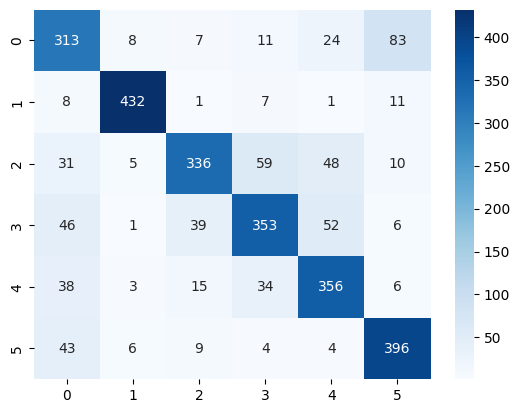

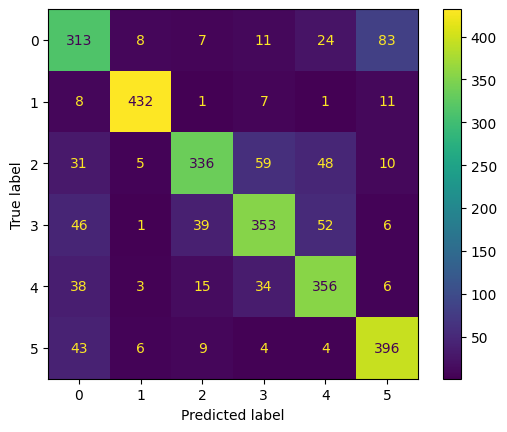

In [21]:
# Evaluación del modelo final
results = np.concatenate([(y, best_model.predict(x=x)) for x, y in validation_ds2], axis=1)
labels = np.argmax(results[0], axis=1)
predictions = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)
sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
disp.plot()


              precision    recall  f1-score   support

           0     0.6534    0.7018    0.6768       446
           1     0.9495    0.9391    0.9443       460
           2     0.8256    0.6871    0.7500       489
           3     0.7543    0.7103    0.7316       497
           4     0.7340    0.7876    0.7599       452
           5     0.7734    0.8571    0.8131       462

    accuracy                         0.7790      2806
   macro avg     0.7817    0.7805    0.7793      2806
weighted avg     0.7826    0.7790    0.7789      2806



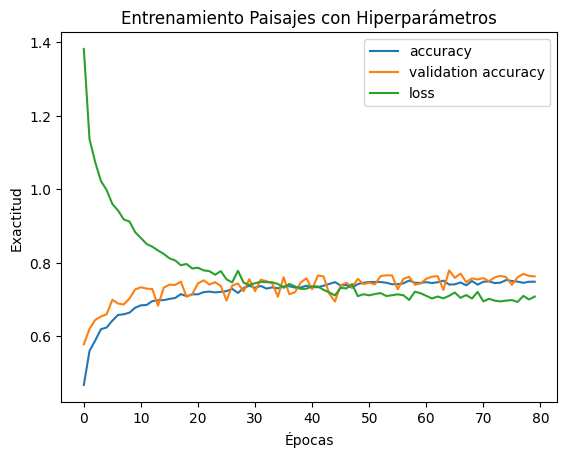

In [22]:
print(classification_report(labels, predictions, digits=4))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='loss')
plt.title('Entrenamiento Paisajes con Hiperparámetros')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend(loc="upper right")
plt.show()

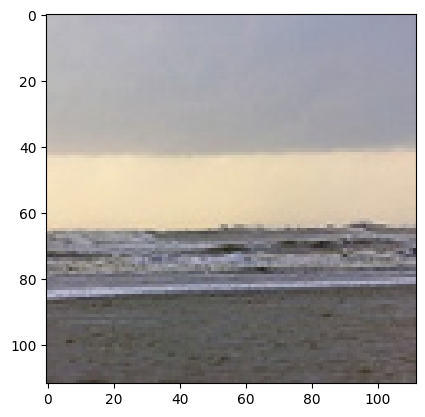

In [23]:
etiquetas=["edificios", "bosque", "glaciar", "montaña", "mar", "calle"]
pil_im = Image.open('/kaggle/input/intel-image-classification/seg_test/seg_test/sea/20106.jpg', 'r')
im = np.asarray(pil_im.resize((112, 112)))
imshow(im)

In [24]:
im = im.reshape(1, 112, 112, 3)

print('El vector de salida obtenido: ', best_model.predict(im))
print('La etiqueta de salida predicha es ', etiquetas[np.argmax(best_model.predict(im))])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
El vector de salida obtenido:  [[3.7621140e-02 8.6980908e-06 2.1934163e-02 1.5029936e-02 9.1568786e-01
  9.7183092e-03]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
La etiqueta de salida predicha es  mar
